# Imports

In [22]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# KNN

In [2]:
data_frame = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
mediaChance = data_frame['Chance of Admit '].mean()

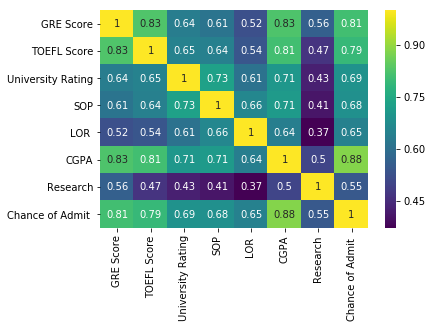

In [4]:
sns.heatmap(data_frame.drop(axis=1, columns=['Serial No.']).corr(), annot=True, cmap='viridis')

In [5]:
data_frame['GRE Score'] = data_frame['GRE Score'] / data_frame['GRE Score'].max()
data_frame['TOEFL Score'] = data_frame['TOEFL Score'] / data_frame['TOEFL Score'].max()
data_frame['University Rating'] = data_frame['University Rating'] / data_frame['University Rating'].max()
data_frame['SOP'] = data_frame['SOP'] / data_frame['SOP'].max()
data_frame['LOR '] = data_frame['LOR '] / data_frame['LOR '].max()
data_frame['CGPA'] = data_frame['CGPA'] / data_frame['CGPA'].max()

In [6]:
knn = KNeighborsClassifier()

In [7]:
data_frame[(data_frame[['Chance of Admit ']] >= mediaChance)] = 1
data_frame[(data_frame[['Chance of Admit ']] < mediaChance)] = 0

data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.991176,0.983333,0.8,0.9,0.9,0.972782,1,1.0
1,2,0.952941,0.891667,0.8,0.8,0.9,0.894153,1,1.0
2,3,0.929412,0.866667,0.6,0.6,0.7,0.806452,1,0.0
3,4,0.947059,0.916667,0.6,0.7,0.5,0.873992,1,1.0
4,5,0.923529,0.858333,0.4,0.4,0.6,0.827621,0,0.0


In [8]:
x = data_frame.drop(['Serial No.', 'Research', 'Chance of Admit '], axis=1)[['GRE Score', 'TOEFL Score', 'CGPA','SOP', 'LOR ', 'University Rating']]
y = data_frame['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
print("Acurácia de teste KNN: ", knn.score(x_test, y_test))

Acurácia de teste KNN:  0.848


# Árvore de Decisão

In [11]:
arvore_entropy = DecisionTreeClassifier('entropy')
arvore_gini = DecisionTreeClassifier()

In [12]:
arvore_entropy.fit(x_train, y_train)
arvore_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
print("Acurácia entropia: ", arvore_entropy.score(x_test, y_test))
print("Acurácia gini: ", arvore_gini.score(x_test, y_test))

Acurácia entropia:  0.808
Acurácia gini:  0.792


# Rede Neural

In [14]:
model = Sequential()
model.add(Dense(128, input_shape=(6,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [15]:
#transforma tudo de cada em parametro em 0 e 1 e coloca em uma lista
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
print("[INFO] treinando a rede neural...")
model.compile(optimizer=SGD(0.1), loss="categorical_crossentropy", metrics=["accuracy"])
train = model.fit(x=x_train, y=y_train, batch_size=128, epochs=500, verbose=2, validation_data=(x_test, y_test))

[INFO] treinando a rede neural...
Train on 375 samples, validate on 125 samples
Epoch 1/500
 - 0s - loss: 0.6973 - acc: 0.4933 - val_loss: 0.6972 - val_acc: 0.4480
Epoch 2/500
 - 0s - loss: 0.6926 - acc: 0.4907 - val_loss: 0.7002 - val_acc: 0.4480
Epoch 3/500
 - 0s - loss: 0.6903 - acc: 0.5200 - val_loss: 0.6869 - val_acc: 0.5520
Epoch 4/500
 - 0s - loss: 0.6900 - acc: 0.5840 - val_loss: 0.7025 - val_acc: 0.4480
Epoch 5/500
 - 0s - loss: 0.6908 - acc: 0.4933 - val_loss: 0.6966 - val_acc: 0.4480
Epoch 6/500
 - 0s - loss: 0.6889 - acc: 0.5147 - val_loss: 0.6865 - val_acc: 0.5520
Epoch 7/500
 - 0s - loss: 0.6912 - acc: 0.4960 - val_loss: 0.6915 - val_acc: 0.4480
Epoch 8/500
 - 0s - loss: 0.6904 - acc: 0.5120 - val_loss: 0.6830 - val_acc: 0.5520
Epoch 9/500
 - 0s - loss: 0.6964 - acc: 0.4773 - val_loss: 0.6873 - val_acc: 0.7200
Epoch 10/500
 - 0s - loss: 0.6891 - acc: 0.5333 - val_loss: 0.6956 - val_acc: 0.4480
Epoch 11/500
 - 0s - loss: 0.6896 - acc: 0.5093 - val_loss: 0.6886 - val_acc: 0

Epoch 97/500
 - 0s - loss: 0.6681 - acc: 0.7360 - val_loss: 0.6748 - val_acc: 0.5040
Epoch 98/500
 - 0s - loss: 0.6746 - acc: 0.6133 - val_loss: 0.6610 - val_acc: 0.5520
Epoch 99/500
 - 0s - loss: 0.6791 - acc: 0.5120 - val_loss: 0.6764 - val_acc: 0.4800
Epoch 100/500
 - 0s - loss: 0.6676 - acc: 0.6800 - val_loss: 0.6735 - val_acc: 0.5120
Epoch 101/500
 - 0s - loss: 0.6678 - acc: 0.6427 - val_loss: 0.6727 - val_acc: 0.5200
Epoch 102/500
 - 0s - loss: 0.6695 - acc: 0.5947 - val_loss: 0.6627 - val_acc: 0.8080
Epoch 103/500
 - 0s - loss: 0.6830 - acc: 0.5600 - val_loss: 0.6591 - val_acc: 0.5520
Epoch 104/500
 - 0s - loss: 0.6741 - acc: 0.4907 - val_loss: 0.6645 - val_acc: 0.8240
Epoch 105/500
 - 0s - loss: 0.6656 - acc: 0.7547 - val_loss: 0.6722 - val_acc: 0.5120
Epoch 106/500
 - 0s - loss: 0.6666 - acc: 0.6347 - val_loss: 0.6639 - val_acc: 0.8080
Epoch 107/500
 - 0s - loss: 0.6676 - acc: 0.6933 - val_loss: 0.6586 - val_acc: 0.6800
Epoch 108/500
 - 0s - loss: 0.6664 - acc: 0.6800 - val_lo

Epoch 193/500
 - 0s - loss: 0.6086 - acc: 0.7867 - val_loss: 0.6357 - val_acc: 0.5680
Epoch 194/500
 - 0s - loss: 0.6069 - acc: 0.7387 - val_loss: 0.5955 - val_acc: 0.8080
Epoch 195/500
 - 0s - loss: 0.6066 - acc: 0.7920 - val_loss: 0.6221 - val_acc: 0.6240
Epoch 196/500
 - 0s - loss: 0.6160 - acc: 0.6747 - val_loss: 0.5948 - val_acc: 0.8080
Epoch 197/500
 - 0s - loss: 0.6031 - acc: 0.7787 - val_loss: 0.5987 - val_acc: 0.8160
Epoch 198/500
 - 0s - loss: 0.6031 - acc: 0.7680 - val_loss: 0.5906 - val_acc: 0.8080
Epoch 199/500
 - 0s - loss: 0.6072 - acc: 0.7440 - val_loss: 0.5909 - val_acc: 0.7280
Epoch 200/500
 - 0s - loss: 0.6136 - acc: 0.6720 - val_loss: 0.5992 - val_acc: 0.7760
Epoch 201/500
 - 0s - loss: 0.6005 - acc: 0.7547 - val_loss: 0.5872 - val_acc: 0.7920
Epoch 202/500
 - 0s - loss: 0.6007 - acc: 0.7227 - val_loss: 0.5936 - val_acc: 0.8000
Epoch 203/500
 - 0s - loss: 0.5954 - acc: 0.7733 - val_loss: 0.5966 - val_acc: 0.7840
Epoch 204/500
 - 0s - loss: 0.5961 - acc: 0.7787 - val

Epoch 289/500
 - 0s - loss: 0.4876 - acc: 0.7947 - val_loss: 0.4817 - val_acc: 0.8160
Epoch 290/500
 - 0s - loss: 0.4864 - acc: 0.8107 - val_loss: 0.4786 - val_acc: 0.8080
Epoch 291/500
 - 0s - loss: 0.4890 - acc: 0.7973 - val_loss: 0.5444 - val_acc: 0.7040
Epoch 292/500
 - 0s - loss: 0.4869 - acc: 0.7760 - val_loss: 0.4744 - val_acc: 0.8080
Epoch 293/500
 - 0s - loss: 0.5373 - acc: 0.7493 - val_loss: 0.5274 - val_acc: 0.7360
Epoch 294/500
 - 0s - loss: 0.5016 - acc: 0.7653 - val_loss: 0.4661 - val_acc: 0.8000
Epoch 295/500
 - 0s - loss: 0.5121 - acc: 0.7387 - val_loss: 0.4936 - val_acc: 0.8000
Epoch 296/500
 - 0s - loss: 0.5049 - acc: 0.7707 - val_loss: 0.4778 - val_acc: 0.8080
Epoch 297/500
 - 0s - loss: 0.5161 - acc: 0.7547 - val_loss: 0.4737 - val_acc: 0.8160
Epoch 298/500
 - 0s - loss: 0.4814 - acc: 0.7947 - val_loss: 0.5250 - val_acc: 0.7360
Epoch 299/500
 - 0s - loss: 0.4913 - acc: 0.7627 - val_loss: 0.5642 - val_acc: 0.6720
Epoch 300/500
 - 0s - loss: 0.5104 - acc: 0.7467 - val

Epoch 385/500
 - 0s - loss: 0.4305 - acc: 0.8053 - val_loss: 0.4576 - val_acc: 0.8000
Epoch 386/500
 - 0s - loss: 0.4447 - acc: 0.7920 - val_loss: 0.4075 - val_acc: 0.8080
Epoch 387/500
 - 0s - loss: 0.4353 - acc: 0.8000 - val_loss: 0.4439 - val_acc: 0.7840
Epoch 388/500
 - 0s - loss: 0.4355 - acc: 0.8027 - val_loss: 0.4018 - val_acc: 0.8240
Epoch 389/500
 - 0s - loss: 0.4946 - acc: 0.7787 - val_loss: 0.4842 - val_acc: 0.7760
Epoch 390/500
 - 0s - loss: 0.4599 - acc: 0.7760 - val_loss: 0.4025 - val_acc: 0.8080
Epoch 391/500
 - 0s - loss: 0.4582 - acc: 0.7680 - val_loss: 0.4799 - val_acc: 0.7760
Epoch 392/500
 - 0s - loss: 0.4338 - acc: 0.8107 - val_loss: 0.4175 - val_acc: 0.8080
Epoch 393/500
 - 0s - loss: 0.4386 - acc: 0.7867 - val_loss: 0.4005 - val_acc: 0.8080
Epoch 394/500
 - 0s - loss: 0.4571 - acc: 0.7627 - val_loss: 0.4188 - val_acc: 0.8160
Epoch 395/500
 - 0s - loss: 0.4433 - acc: 0.7840 - val_loss: 0.4154 - val_acc: 0.8080
Epoch 396/500
 - 0s - loss: 0.5060 - acc: 0.7627 - val

Epoch 481/500
 - 0s - loss: 0.4162 - acc: 0.8187 - val_loss: 0.3865 - val_acc: 0.8000
Epoch 482/500
 - 0s - loss: 0.4173 - acc: 0.8133 - val_loss: 0.3892 - val_acc: 0.8080
Epoch 483/500
 - 0s - loss: 0.4157 - acc: 0.8000 - val_loss: 0.3879 - val_acc: 0.8080
Epoch 484/500
 - 0s - loss: 0.4399 - acc: 0.7733 - val_loss: 0.4915 - val_acc: 0.7760
Epoch 485/500
 - 0s - loss: 0.4503 - acc: 0.7920 - val_loss: 0.3836 - val_acc: 0.8320
Epoch 486/500
 - 0s - loss: 0.4180 - acc: 0.8080 - val_loss: 0.3939 - val_acc: 0.8080
Epoch 487/500
 - 0s - loss: 0.4203 - acc: 0.8107 - val_loss: 0.4051 - val_acc: 0.8080
Epoch 488/500
 - 0s - loss: 0.4331 - acc: 0.7947 - val_loss: 0.3938 - val_acc: 0.8000
Epoch 489/500
 - 0s - loss: 0.4707 - acc: 0.7627 - val_loss: 0.4179 - val_acc: 0.7920
Epoch 490/500
 - 0s - loss: 0.4157 - acc: 0.8080 - val_loss: 0.3847 - val_acc: 0.8160
Epoch 491/500
 - 0s - loss: 0.4200 - acc: 0.7973 - val_loss: 0.3841 - val_acc: 0.8160
Epoch 492/500
 - 0s - loss: 0.4386 - acc: 0.7840 - val

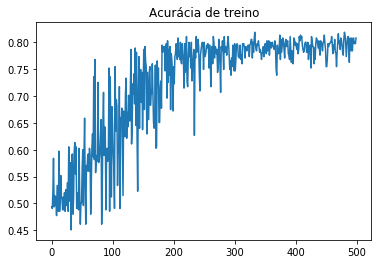

In [17]:
plt.title("Acurácia de treino")
plt.plot(train.history['acc'])
plt.show()

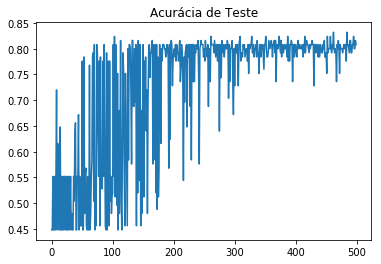

In [18]:
plt.title("Acurácia de Teste")
plt.plot(train.history['val_acc'])
plt.show()

# SOM